In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf
from ta import add_all_ta_features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [245]:
# Download historical data from Yahoo Finance
def download_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

ticker_symbol = 'DATAPATTNS.NS'
start_date = '2010-01-01'
end_date = '2024-05-15'
data = download_stock_data(ticker_symbol, start_date, end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-24,856.049988,864.000000,743.849976,755.000000,750.557312,13492548
2021-12-27,738.500000,741.700012,702.349976,705.750000,701.597107,2137929
2021-12-28,705.750000,748.000000,702.000000,734.599976,730.277344,1586404
2021-12-29,748.000000,824.000000,740.200012,787.250000,782.617554,5408945
2021-12-30,792.450012,814.000000,772.049988,778.299988,773.720215,1904086


In [53]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-08,2740.000000,2860.000000,2715.100098,2796.350098,2796.350098,296586
2024-05-09,2801.000000,2934.000000,2797.550049,2848.649902,2848.649902,842977
2024-05-10,2880.000000,2889.850098,2755.000000,2812.750000,2812.750000,289083
2024-05-13,2812.699951,2839.949951,2737.850098,2768.550049,2768.550049,188211
2024-05-14,2859.949951,2984.000000,2808.750000,2959.550049,2959.550049,674627


In [54]:
# Check for missing values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 588 entries, 2021-12-24 to 2024-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       588 non-null    float64
 1   High       588 non-null    float64
 2   Low        588 non-null    float64
 3   Close      588 non-null    float64
 4   Adj Close  588 non-null    float64
 5   Volume     588 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 32.2 KB


In [56]:
# Summary statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,588.000000,588.000000,588.000000,588.000000,588.000000,5.880000e+02
mean,1489.302549,1522.952294,1457.421006,1486.776192,1484.271103,3.205696e+05
std,631.438166,643.952191,615.783879,628.508481,629.951853,6.909627e+05
min,578.299988,594.200012,575.000000,585.349976,581.905579,0.000000e+00
25%,833.075012,852.599991,815.499985,833.400024,828.496033,1.078678e+05
50%,1396.024963,1426.299988,1359.674988,1391.100037,1387.986572,1.667530e+05
75%,1978.700012,2002.774994,1938.175049,1973.937469,1973.937469,3.001890e+05
max,3124.000000,3208.949951,3043.800049,3105.050049,3105.050049,1.349255e+07


In [225]:
fig = go.Figure(data = go.Ohlc( x = data.index,open = data.Open, close = data.Close, low =data.Low, high = data.High))
fig.show()

## In Above chart verticle line shows the high and low stock price of the period, while the line to the left marks the open price and the line to the right marks the closing price.

# Exploratory Analysis

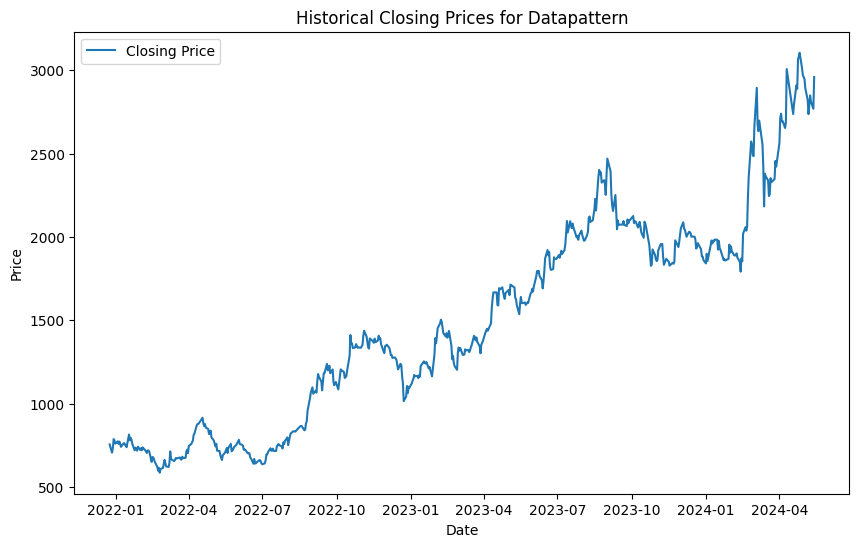

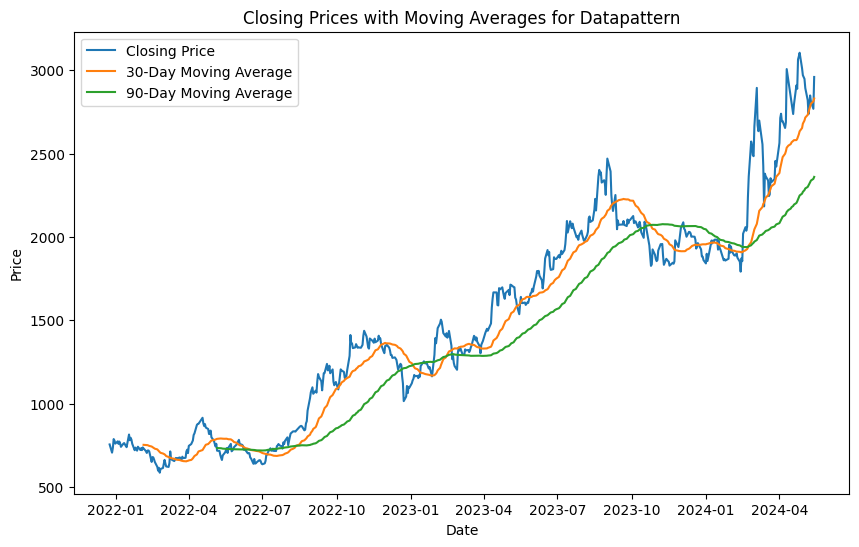

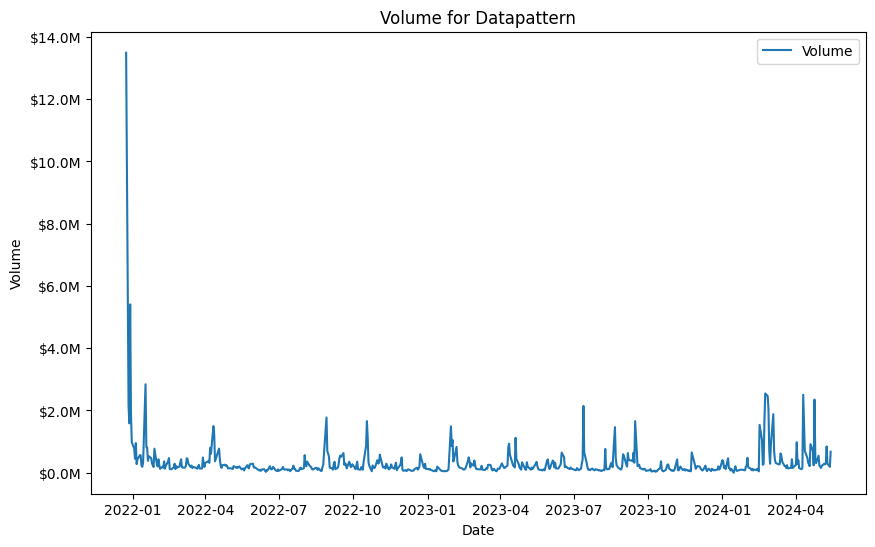

In [226]:
from matplotlib.ticker import FuncFormatter

# Plot historical prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title('Historical Closing Prices for Datapattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate moving averages
data['MA30'] = data['Close'].rolling(window=30).mean()
data['MA90'] = data['Close'].rolling(window=90).mean()

# Plot moving averages
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA30'], label='30-Day Moving Average')
plt.plot(data['MA90'], label='90-Day Moving Average')
plt.title('Closing Prices with Moving Averages for Datapattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Define a function to format the y-axis labels
def billions(x, pos):
    'The two args are the value and tick position'
    return f'${x * 1e-9:.1f}B'
def millions(x, pos):
    'The two args are the value and tick position'
    return f'${x * 1e-6:.1f}M'


# Plot volume
plt.figure(figsize=(10, 6))

plt.plot(data['Volume'], label='Volume')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
# plt.plot(data['Close'], label='Closing Price')
# plt.plot(data['MA30'], label='30-Day Moving Average')
# plt.plot(data['MA90'], label='90-Day Moving Average')
plt.title('Volume for Datapattern')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()



# EDA Conclusion

### Price Trends and Moving Averages
1. **Upward Trend in Price**: The closing price of DataPattern stock shows a general upward trend from early 2022 to mid-2024. There are periods of volatility, but the overall trajectory is upward, indicating a growing stock price.

2. **Moving Averages Confirmation**: The 30-day moving average (orange line) and the 90-day moving average (green line) both follow the upward trend of the closing price. These moving averages smooth out short-term fluctuations and help confirm the long-term trend.

3. **Moving Average Crossovers**:
   - **Golden Cross**: In early 2023, the 30-day moving average crosses above the 90-day moving average, a bullish signal often referred to as a "golden cross". This indicates a potential for further price increases.
   - **Bearish Crossover**: Conversely, in mid-2023, the 30-day moving average crosses below the 90-day moving average, a bearish signal indicating potential declines.
   - **Another Golden Cross**: In early 2024, another golden cross occurs, suggesting a bullish outlook.

4. **Volatility and Support/Resistance Levels**: The stock shows periods of high volatility with sharp price increases and decreases. The moving averages provide a rough indication of support and resistance levels where the price tends to bounce off.


### Volume Analysis
1. **Initial High Volume**: There is an extremely high trading volume in early 2022, which quickly tapers off. This spike might indicate an initial public offering (IPO) or a major news event attracting significant trading interest.

2. **Subsequent Low Volume**: Following the initial spike, trading volume remains relatively low throughout most of the observed period, with occasional spikes. This low volume suggests less active trading, which could indicate reduced investor interest or stabilization after the initial surge.

3. **Periodic Spikes in Volume**: Occasional spikes in volume are seen throughout the period. These spikes often correspond to significant movements in the stock price, suggesting that news events or other catalysts are prompting increased trading activity.

4. **Recent Increase in Volume**: In early 2024, there is a noticeable increase in volume, aligning with a sharp rise in stock price. Increased volume in conjunction with rising prices is typically a bullish signal, indicating strong investor interest and confidence.

### Overall Conclusions
- The general upward trend in the stock price, confirmed by the moving averages, suggests that DataPattern has experienced growth over the observed period.
- The moving average crossovers provide useful signals for potential entry and exit points, with golden crosses indicating bullish periods and bearish crossovers suggesting caution.
- The initial high volume followed by lower, more stable volumes implies that after an initial period of high interest, trading stabilized, with periodic spikes likely due to specific events or news.
- The recent increase in both volume and price indicates renewed investor interest and potentially positive developments for DataPattern.

These insights can help investors make more informed decisions about their positions in DataPattern stock.

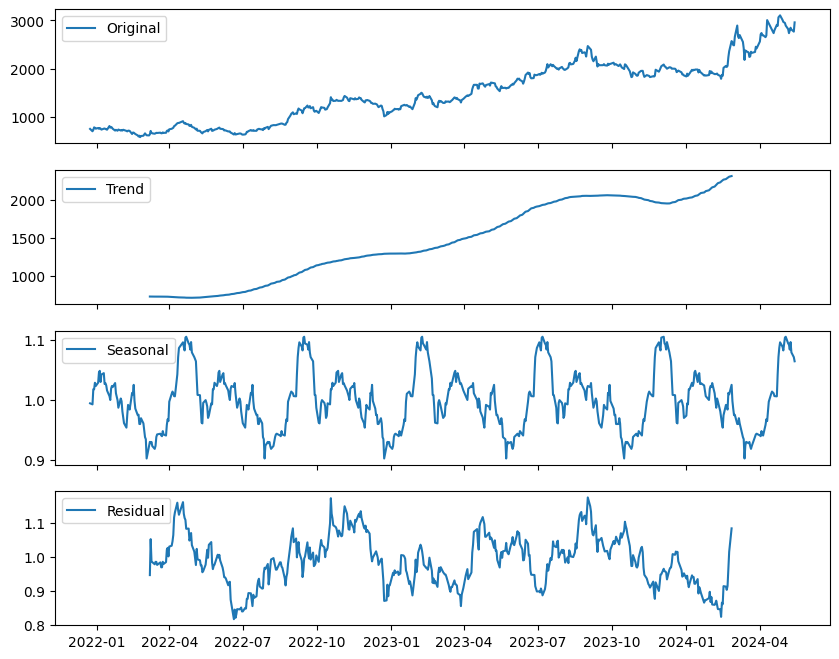

In [227]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=100)

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax1.plot(data['Close'], label='Original')
ax1.legend(loc='upper left')
ax2.plot(decomposition.trend, label='Trend')
ax2.legend(loc='upper left')
ax3.plot(decomposition.seasonal, label='Seasonal')
ax3.legend(loc='upper left')
ax4.plot(decomposition.resid, label='Residual')
ax4.legend(loc='upper left')

plt.show()


The plots above show a decomposition of the DataPattern stock price series into its constituent components: trend, seasonal, and residual. This type of analysis helps to better understand the underlying patterns in the data. Let's break down each component:

### Original Series
- **Original Series**: The top plot shows the actual closing prices of the DataPattern stock, which depicts an overall upward trend with some fluctuations.

### Trend Component
- **Trend**: The second plot shows the trend component, which represents the long-term progression of the stock price. This component smooths out short-term fluctuations and highlights the overall direction of the stock price.
  - **Upward Trend**: The trend component clearly shows a steady increase in the stock price from early 2022 to mid-2024, confirming the long-term growth of the stock.
  - **Flattening and Re-acceleration**: There is a period where the trend flattens slightly around mid-2023, but it re-accelerates towards early 2024, suggesting renewed growth momentum.

### Seasonal Component
- **Seasonal**: The third plot displays the seasonal component, which captures the repetitive, periodic fluctuations in the stock price.
  - **Seasonal Variation**: The seasonal component oscillates regularly, suggesting that the stock price experiences periodic ups and downs within a certain range. This could be due to recurring factors such as quarterly earnings reports, industry cycles, or other regular market influences.
  - **Amplitude and Periodicity**: The amplitude of the seasonal component is relatively stable, oscillating around a mean value, indicating consistent seasonal effects over time.

### Residual Component
- **Residual**: The bottom plot shows the residual component, which represents the random noise or irregular fluctuations in the stock price that are not explained by the trend or seasonal components.
  - **Volatility**: The residuals exhibit noticeable volatility, indicating periods of unexpected or irregular price movements. Significant spikes in the residuals can be seen, especially towards the end of the period (early 2024), which could be due to market reactions to unforeseen events or news.
  - **Mean Reversion**: The residuals fluctuate around a mean value of approximately 1, suggesting that deviations from the trend and seasonal components tend to revert to the mean over time.

### Overall Conclusions
1. **Long-Term Growth**: The trend component confirms the long-term upward movement in DataPattern's stock price, indicating a positive growth trajectory.
2. **Seasonal Patterns**: Regular, periodic fluctuations are captured in the seasonal component, suggesting that certain times of the year consistently impact the stock price.
3. **Irregular Movements**: The residual component highlights the presence of unpredictable and irregular price changes, which could be due to market-specific events or other exogenous factors.
4. **Recent Volatility**: There is an increase in volatility in the residuals towards the end of the period, which could signal recent market developments affecting the stock.

This decomposition helps investors and analysts understand the different forces at play in the stock's price movements, allowing for more informed decision-making based on long-term trends, seasonal patterns, and irregular fluctuations.

In [228]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If the series is not stationary, apply differencing
data['Close_diff'] = data['Close'].diff().dropna()

# Perform ADF test on differenced data
result_diff = adfuller(data['Close_diff'].dropna())
print(f'ADF Statistic (differenced): {result_diff[0]}')
print(f'p-value (differenced): {result_diff[1]}')


ADF Statistic: 0.15251740736106079
p-value: 0.9694691080130032
ADF Statistic (differenced): -17.950679779524577
p-value (differenced): 2.8393435835405382e-30


The code above performs the Augmented Dickey-Fuller (ADF) test to check for stationarity in the DataPattern stock's closing price time series.

### Augmented Dickey-Fuller (ADF) Test
The ADF test is used to determine whether a time series is stationary or not. Stationarity implies that the statistical properties of the series (mean, variance) do not change over time. The null hypothesis of the ADF test is that the series has a unit root (i.e., it is non-stationary), while the alternative hypothesis is that the series is stationary.

### Results Analysis

#### Original Series
- **ADF Statistic: 0.15251740736106079**
- **p-value: 0.9694691080130032**

For the original series:
- The ADF statistic is 0.1525, which is quite high.
- The p-value is 0.9694, which is much greater than common significance levels (0.01, 0.05, 0.10).

**Conclusion**: Since the p-value is very high, we fail to reject the null hypothesis. This indicates that the original closing price series is non-stationary.

#### Differenced Series
- **ADF Statistic (differenced): -17.950679779524577**
- **p-value (differenced): 2.8393435835405382e-30**

For the differenced series:
- The ADF statistic is -17.9507, which is much lower than the critical values for stationarity.
- The p-value is extremely low (2.8393e-30), far below common significance levels.

**Conclusion**: Since the p-value is extremely low, we reject the null hypothesis. This indicates that the differenced series is stationary.

### Overall Conclusions
1. **Original Series is Non-Stationary**: The high p-value from the ADF test on the original closing price series indicates that the series is non-stationary. This implies that the mean and variance of the closing prices change over time, which is typical for stock prices.

2. **Differenced Series is Stationary**: The very low p-value from the ADF test on the differenced series indicates that differencing the data once makes the series stationary. This means that the first differences of the closing prices have constant mean and variance over time.

3. **Differencing to Achieve Stationarity**: To model the time series data effectively, especially for time series forecasting methods like ARIMA, the series needs to be stationary. The results show that applying a first difference to the closing prices achieves stationarity.

### Practical Implications
- **Modeling**: Since the differenced series is stationary, it is suitable for time series modeling techniques that assume stationarity (e.g., ARIMA models).
- **Forecasting**: With the series differenced, forecasts can be made using the stationary data, which can then be transformed back to the original scale.
- **Analysis**: Understanding the non-stationarity of the original series and transforming it to stationarity allows for better analysis and more reliable statistical inference.

This analysis provides a strong basis for further time series modeling and forecasting, ensuring that the assumptions of stationarity required for many statistical methods are satisfied.

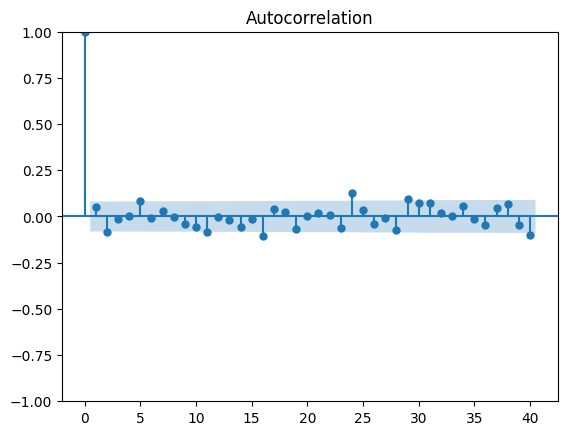

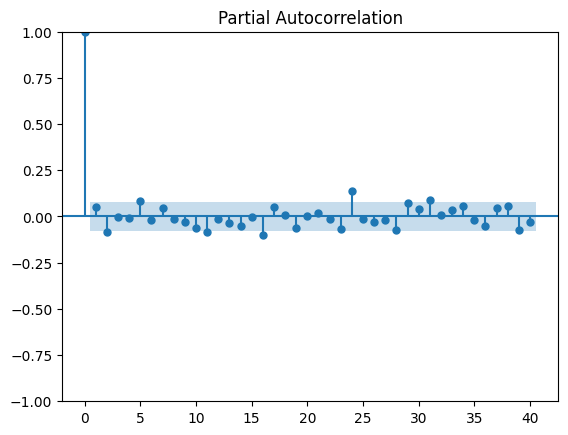

In [229]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for original series
plot_acf(data['Close_diff'].dropna(), lags=40)
plot_pacf(data['Close_diff'].dropna(), lags=40)
plt.show()

In [246]:
# Calculate additional features
data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")

In [247]:
# Drop NaN values
data.drop(['trend_psar_up','trend_psar_down','Open','High','Low','Close'],axis = 1, inplace= True)
data = data.dropna()

In [248]:
# Define the target variable
target = 'Adj Close'
data['Target'] = data[target].shift(-1)  # Predict next day's closing price
data.dropna(inplace = True)
data.drop(['Adj Close'],axis = 1, inplace= True)



C:\Users\yatim\AppData\Local\Temp\ipykernel_18296\3129840661.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yatim\AppData\Local\Temp\ipykernel_18296\3129840661.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yatim\AppData\Local\Temp\ipykernel_18296\3129840661.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [252]:
# Split data into train and test sets
#The function dataframe.columns.difference() gives you complement of the values that you provide as argument. It can be used to create a new dataframe 
#from an existing dataframe with exclusion of some columns. The function returns as output a new list of columns from the existing columns excluding
#the ones given as arguments. You can also check it:
features = data.columns.difference(['Target'])
X = data[features]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)



In [256]:
# Standardize predictor variables
#Standardize features by removing the mean and scaling to unit variance. 
#The standard score of a sample x is calculated as:
#z = (x - u) / s
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [267]:
# Initialize and train the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest Regressor', RandomForestRegressor())
]



In [269]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
count,342.000000,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,342.000000,...,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,0.000000,8.310441e-17,-1.246566e-16,-1.038805e-17,4.155221e-17,-2.077610e-17,1.038805e-17,2.597013e-17,-1.038805e-17,0.000000,...,9.557008e-16,-1.038805e-17,-5.194026e-18,-2.077610e-17,-6.232831e-17,1.703640e-15,-4.155221e-16,4.155221e-17,3.324177e-16,-8.310441e-17
std,1.001465,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465,...,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-0.805267,-2.736685e+00,-1.462048e+00,-2.438714e+00,-2.793778e+00,-2.289444e+00,-1.619800e+00,-1.623171e+00,-1.731311e+00,-2.403280,...,-2.151043e+00,-2.309878e+00,-3.206906e+00,-1.956683e+00,-2.658933e+00,-2.070577e+00,-1.659490e+00,-3.635645e+00,-1.459513e+00,-1.484074e+00
25%,-0.509284,-8.034000e-01,-7.459095e-01,-6.513457e-01,-6.949107e-01,-7.149022e-01,-7.404677e-01,-6.910843e-01,-7.853654e-01,-0.695189,...,-5.627396e-01,-7.414448e-01,-5.570657e-01,-5.810581e-01,-6.949918e-01,-8.305789e-01,-7.508914e-01,-6.309289e-01,-8.100855e-01,-7.796416e-01
50%,-0.327320,-8.347397e-03,-1.399216e-02,1.039235e-01,7.386437e-03,1.166788e-01,-1.550847e-01,-2.091291e-01,-1.251822e-01,0.052576,...,-7.999922e-02,5.298484e-02,1.259794e-01,-4.123719e-01,2.169209e-01,-4.392938e-02,1.694440e-02,-1.238633e-02,-3.712691e-02,-4.026914e-05
75%,0.137897,7.082700e-01,7.240243e-01,6.807272e-01,7.226984e-01,6.919709e-01,5.397889e-01,3.889422e-01,8.271588e-01,0.632808,...,6.823665e-01,6.301936e-01,5.800202e-01,2.907328e-01,7.620589e-01,5.174886e-01,7.298432e-01,7.106613e-01,9.036905e-01,6.896211e-01
max,7.529039,2.022878e+00,2.244903e+00,2.498560e+00,2.240694e+00,2.282494e+00,3.181666e+00,4.825259e+00,2.444974e+00,3.336715,...,3.135595e+00,2.762315e+00,2.719748e+00,5.165066e+00,1.592095e+00,3.378716e+00,1.922161e+00,2.446049e+00,1.862353e+00,2.270009e+00


In [259]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.432457,-0.004213,2.073511,-0.325709,0.022741,-0.357701,0.103819,-0.042262,0.173367,-0.134490,...,-2.930775,-0.570060,-0.351057,1.716583,-0.301505,-2.099062,1.977507,-1.460347,2.503228,1.993242
std,1.954186,1.880171,0.730172,1.020390,1.107253,0.997244,1.188686,1.061126,1.290238,1.192784,...,1.234491,1.151671,2.663526,4.176911,1.078591,0.534768,0.612764,3.256407,1.156924,0.756633
min,-0.790660,-2.398945,1.295674,-1.753765,-2.246001,-1.699263,-2.308558,-1.851530,-2.421817,-2.109528,...,-5.351494,-2.697349,-10.931767,-2.180932,-2.857723,-3.667856,1.443231,-10.372099,1.594635,1.278213
25%,-0.542533,-1.504287,1.463530,-1.077832,-0.667946,-1.126270,-0.601787,-0.721743,-0.644419,-0.926294,...,-3.842548,-1.327328,-1.389822,-0.763665,-1.209647,-2.316896,1.504430,-2.883092,1.622703,1.391813
50%,-0.311608,-0.610650,1.844032,-0.645595,-0.004734,-0.680152,-0.108297,-0.149196,0.103890,-0.454897,...,-3.001071,-0.838549,-0.081996,-0.273814,-0.412302,-1.895610,1.591149,-0.790389,1.731269,1.672410
75%,0.329668,1.072548,2.705408,0.405262,0.576977,0.506084,0.824081,0.517018,0.842730,0.429938,...,-1.805419,0.475790,1.004795,2.313774,0.712563,-1.786853,2.521427,0.486229,3.569131,2.513258
max,9.112385,5.521460,3.480256,2.308480,3.368554,1.910064,3.648228,3.432997,3.621274,4.802315,...,1.088517,2.172063,5.786090,18.419012,1.587258,-1.030994,3.331099,6.245660,4.831351,3.646886


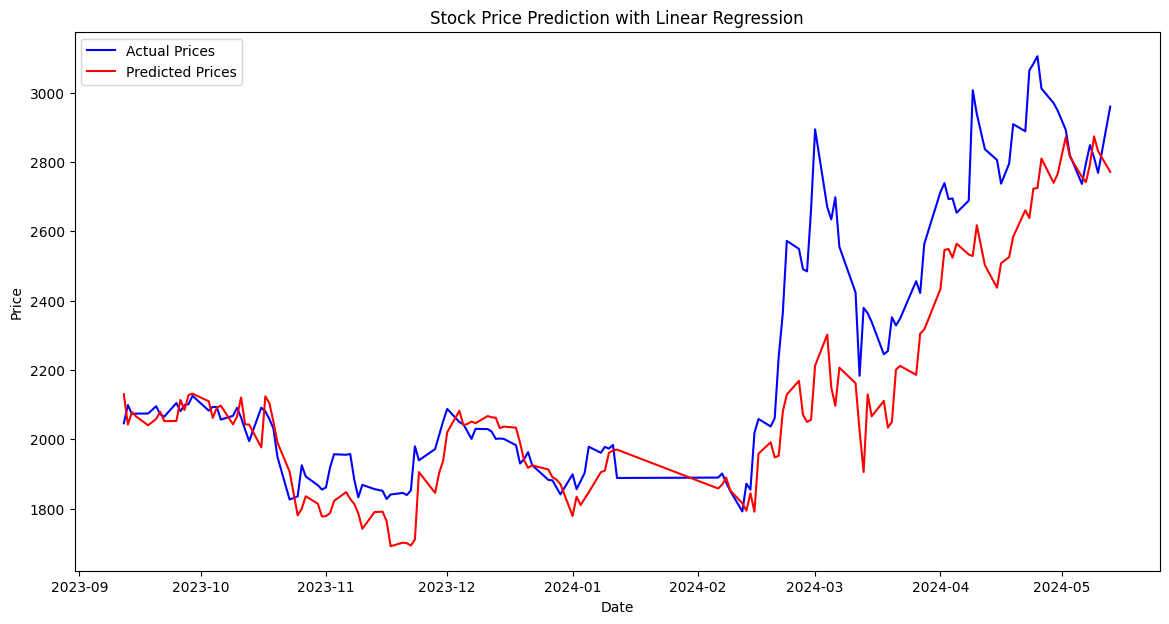

In [266]:
# Backtesting and visualization of one of the models (e.g., LinearRegressio)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [261]:
# Backtesting and visualization of one of the models (e.g., Random Forest Regressor)
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



In [263]:
mse = mean_squared_error(y_test, predictions)
mse

99210.46550415554

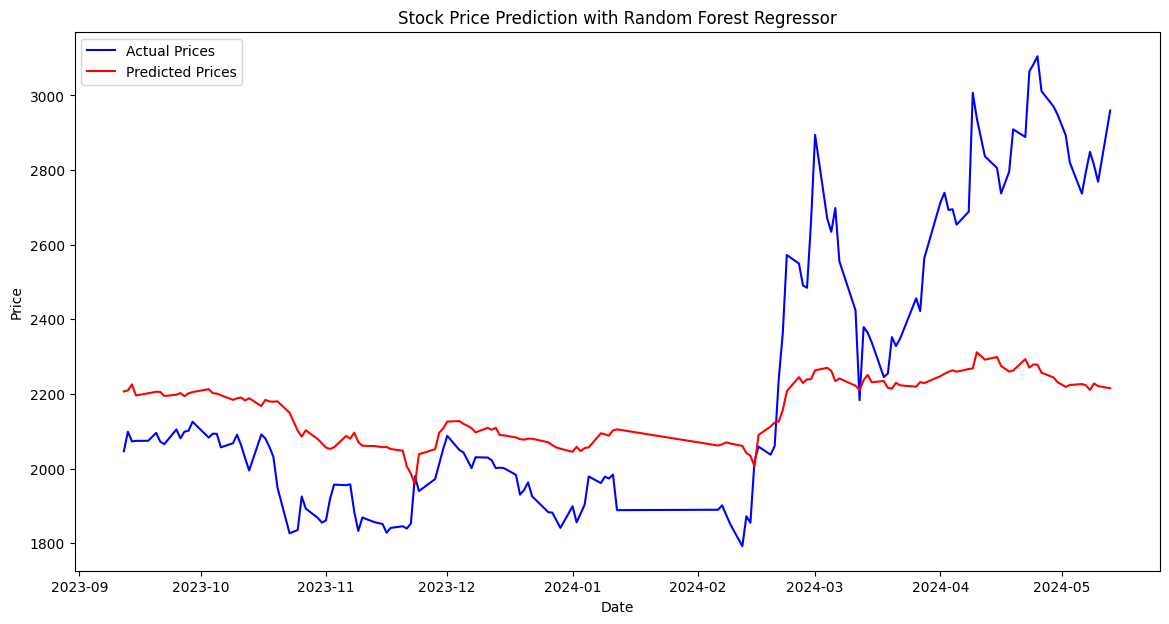

In [264]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction with Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### ML - Random Forest vs Linear Regression
From the comparison of the two stock price prediction plots for DataPattern stock, one using a Random Forest Regressor and the other using Linear Regression, several conclusions can be drawn:

1. **Model Performance**:
   - **Random Forest Regressor**: The predictions (red line) are relatively stable and do not capture the high volatility and sharp movements present in the actual prices (blue line). The predicted prices generally remain around a certain level and fail to follow the actual price trends closely, particularly missing significant upward and downward spikes.
   - **Linear Regression**: If this plot were to be similar to the one for the Random Forest Regressor, we might expect it to show even less variability, as linear regression tends to smooth out fluctuations and may not capture complex patterns in the data as effectively.

2. **Prediction Accuracy**:
   - The Random Forest Regressor seems to provide more nuanced predictions compared to a typical linear model. However, it still struggles with the high volatility and sharp changes in stock prices. This can be inferred from the deviations between the predicted and actual prices.
   - Linear regression, on the other hand, would likely be even less accurate for a highly volatile stock as it cannot account for non-linear relationships and is typically more suited for data with a linear trend.

3. **Model Suitability for Stock Price Prediction**:
   - Stock prices are influenced by a myriad of factors and often exhibit non-linear and complex patterns. The Random Forest Regressor, while more flexible than linear regression, still faces challenges in accurately predicting these patterns, particularly in highly volatile and unpredictable markets.
   - Linear Regression, being a simpler model, is generally less suitable for stock price prediction due to its inability to model complex relationships and adapt to sudden changes in trends.

4. **General Observations**:
   - Both models have limitations when applied to stock price prediction. Random Forest might perform better than Linear Regression but still falls short of capturing the full complexity of stock price movements.
   - The choice of model should consider the nature of the data and the specific requirements of the prediction task. For highly volatile and non-linear data like stock prices, more sophisticated models such as deep learning or ensemble methods might be required to achieve better accuracy.

In [231]:
data.reset_index(inplace=True)

In [239]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Define the order of the model (p, d, q)
p = 1
d = 1
q = 1
# Split the data into training and test sets (80% train, 20% test)
data_train_size = int(len(data) * 0.8)
data_train, data_test = data['Close'][:data_train_size], data['Close'][data_train_size:]

# Fit the ARIMA model on the training set
data_model = ARIMA(data_train, order=(p, d, q))
data_model_fit = data_model.fit()


In [240]:
#  Forecast the test set period
data_forecast = data_model_fit.forecast(steps=len(data_test))
# data_forecast_index = data_test.index
# data_forecast_series = pd.Series(forecast, index=forecast_index)
print(data_test)
print(data_forecast)

470    1827.800049
471    1840.750000
472    1845.199951
473    1839.199951
474    1852.400024
          ...     
583    2796.350098
584    2848.649902
585    2812.750000
586    2768.550049
587    2959.550049
Name: Close, Length: 118, dtype: float64
470    1853.310705
471    1851.872361
472    1852.901296
473    1852.165236
474    1852.691784
          ...     
583    1852.472197
584    1852.472197
585    1852.472197
586    1852.472197
587    1852.472197
Name: predicted_mean, Length: 118, dtype: float64


In [241]:
# Evaluate the model performance
data_mae = mean_absolute_error(data_test, data_forecast)
data_rmse = np.sqrt(mean_squared_error(data_test, data_forecast))

In [242]:
print(f'Mean Absolute Error (MAE): {data_mae}')
print(f'Root Mean Squared Error (RMSE): {data_rmse}')

Mean Absolute Error (MAE): 415.53566214257603
Root Mean Squared Error (RMSE): 576.7687926602189


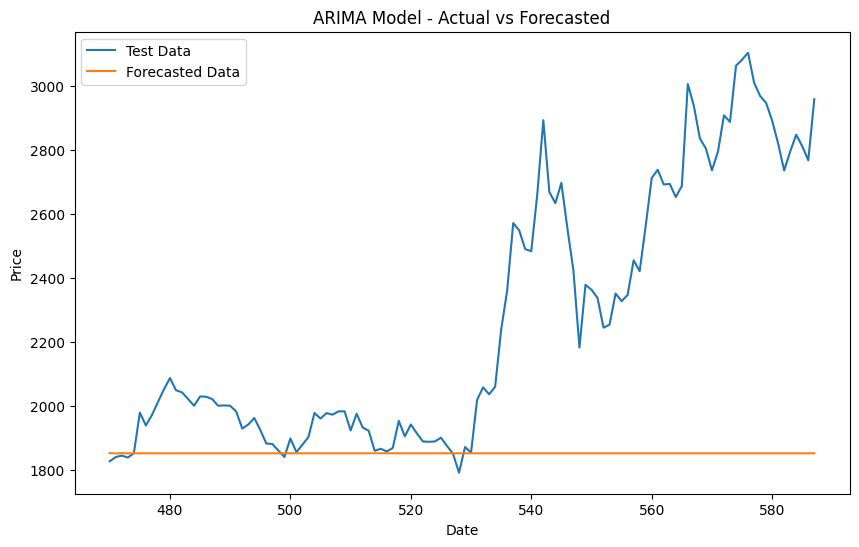

In [243]:
# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
# plt.plot(data_train, label='Training Data')
plt.plot(data_test, label='Test Data')
plt.plot(data_forecast, label='Forecasted Data')
plt.title('ARIMA Model - Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()